In [2]:
    import matplotlib.pyplot as plt
    import csv
    import numpy as np
    %matplotlib inline

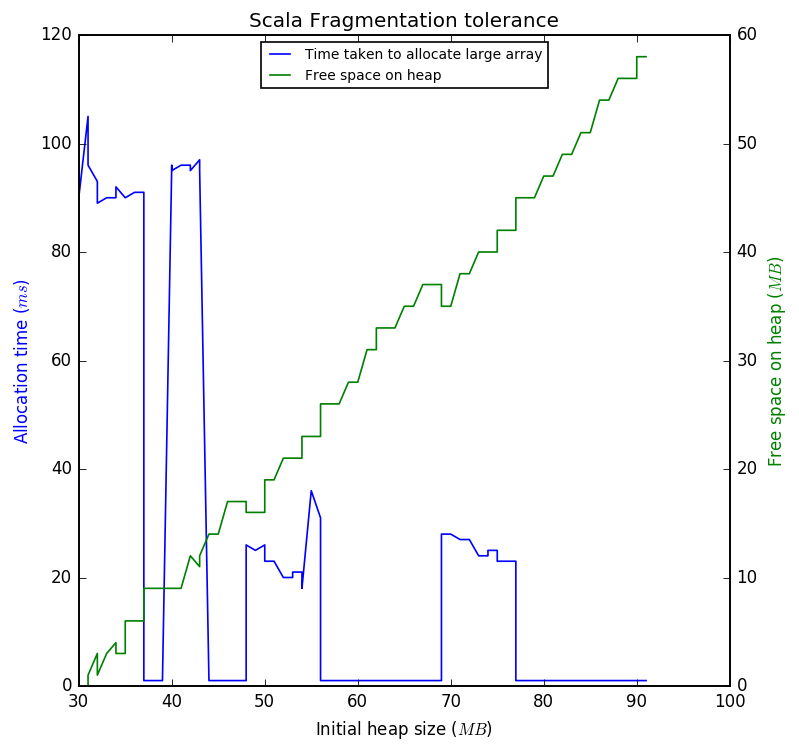

In [3]:
heap, time , free = np.loadtxt('scalafrag.txt', delimiter=',', unpack=True)

fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()

ax1.set_ylabel("Allocation time ($ms$)",color = 'blue')
ax1.set_xlabel("Initial heap size ($MB$)")

ax2.set_ylabel("Free space on heap ($MB$)",color = 'green')
ax2.set_xlabel("Initial heap size ($MB$)")


p1,= ax1.plot(heap,time, label='Time taken to allocate large array')
p2,= ax2.plot(heap,free , label='Free space on heap' ,color = 'green')


plt.title('Scala Fragmentation tolerance')

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')


lines =[p1,p2]

plt.legend(lines, [l.get_label() for l in lines],prop = fontP ,loc =9)

plt.show()
